In [86]:
# import the important libraries/packages
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
from collections import Counter
import gensim

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
train_data = pd.read_csv('quora-question-pair//train.csv')

In [7]:
test_data = pd.read_csv('quora-question-pair//test.csv')

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
test_data.describe()

,test_id,question1,question2
count,3563475,3563471,3563469
unique,2607940,2211008,2227399
top,1303969,What,What
freq,2,2033,2016


In [9]:
train_data.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [10]:
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [12]:
print("Queation 1: ",test_data['question1'][0])
print("Question 2: ", test_data['question2'][0])

Queation 1:  How does the Surface Pro himself 4 compare with iPad Pro?
Question 2:  Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?


In [13]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [14]:
train_data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [15]:
print("Size of the test data: ", test_data.size)
print("Size of the train data: ", train_data.size)

Size of the test data:  10690425
Size of the train data:  2425740


# Missing Data

**Missing data in test Datasest**

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


NOTE: There is no missing data. There is no null value present in any column

**Length of the longest question in question1 column**

In [31]:
max(train_data.question1.str.len())

623

**Number of similar and different questoions:**

In [34]:
train_data.groupby("is_duplicate")['id'].count()

is_duplicate
0    255027
1    149263
Name: id, dtype: int64

**question1 column insights**

In [96]:
text1 = " ".join(train_data["question1"]).lower()
words1 = re.findall('\w+',text1)


In [97]:
stopwords = nltk.corpus.stopwords.words('english')

In [99]:
words_ns1 = []
for word in words1:
    if word not in stopwords:
        words_ns1.append(word)

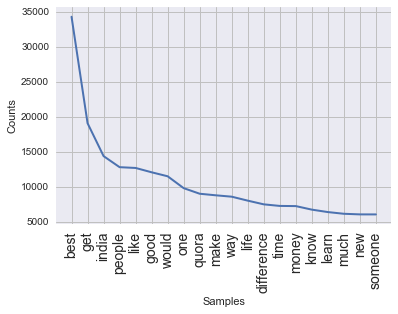

In [128]:
sns.set()
# Creating the word frequency distribution
freqdist1 = nltk.FreqDist(words_ns1)

# Plotting the word frequency distribution
plt.xticks(fontsize =14)
freqdist1.plot(20)


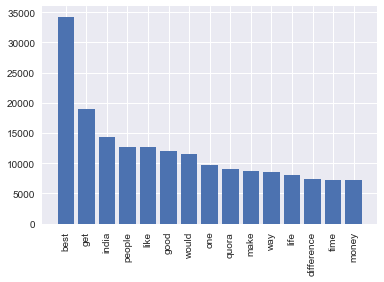

In [164]:
plt.bar(range(15),[word[1] for word in freqdist1.most_common()[:15]])
plt.xticks(range(15),index_question1_keys,rotation=90,fontsize=10)
plt.show()

In [177]:
freqdist1.most_common()[:25]

[('best', 34258),
 ('get', 19044),
 ('india', 14345),
 ('people', 12764),
 ('like', 12652),
 ('good', 12033),
 ('would', 11463),
 ('one', 9767),
 ('quora', 8969),
 ('make', 8746),
 ('way', 8547),
 ('life', 7982),
 ('difference', 7453),
 ('time', 7227),
 ('money', 7203),
 ('know', 6697),
 ('learn', 6349),
 ('much', 6105),
 ('new', 6018),
 ('someone', 6014),
 ('use', 5715),
 ('many', 5683),
 ('think', 5556),
 ('trump', 5351),
 ('indian', 5349)]

**questionn2 column insight**

In [171]:
text2 = " ".join(str(train_data["question2"])).lower()
words2 = re.findall('\w+', text2)

In [174]:
words_ns2 = []
for word in words2:
    if word not in stopwords:
        words_ns2.append(word)

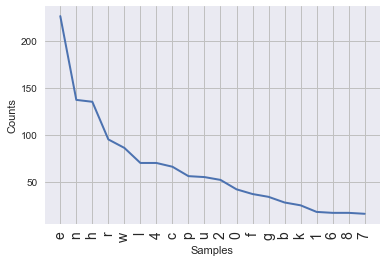

In [175]:
# Creating the word frequency distribution
freqdist2 = nltk.FreqDist(words_ns2)

# Plotting the word frequency distribution
plt.xticks(fontsize =14)
freqdist2.plot(20)


In [181]:
Counter(" ".join(train_data["question2"]).split()).most_common(100)

TypeError: sequence item 105780: expected str instance, float found

In [183]:
type(train_data["question2"][105780])

float